# Results analysis

The following is the code used to analyze the results from optimization and inference for the **Energy Efficiency Measurement in pruned and quantized ML models**. We do not perform the analysis in this notebook as it is done directly in the memory of the project. In this notebook we find dataframe transformations and plots used in the analysis.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

## Preliminary analysis

In [5]:
inference = pd.read_csv('../results/inference_results.csv')
inference = inference[['duration', 'energy_consumed', 'domain', 'model', 'framework', 'version', 'correctness']]
inference = inference.replace('quantized.pth', 'quantized')
inference['energy_consumed'] = inference['energy_consumed'] * 1000
inference

,duration,energy_consumed,domain,model,framework,version,correctness
0,59.276125,0.956204,NLP,gpt2,torch,baseline,0.895445
1,59.687963,0.954358,NLP,gpt2,torch,baseline,0.898786
2,60.156222,0.965684,NLP,gpt2,torch,baseline,0.908001
3,61.515913,0.986334,NLP,gpt2,torch,baseline,0.892121
4,59.798992,0.959993,NLP,gpt2,torch,baseline,0.891528
...,...,...,...,...,...,...,...
1075,27.594316,0.441194,Code,codegpt,tf,quantized,0.527349
1076,25.453180,0.405151,Code,codegpt,tf,quantized,0.527349
1077,30.093821,0.479078,Code,codegpt,tf,quantized,0.526099
1078,27.078465,0.430685,Code,codegpt,tf,quantized,0.527349


In [6]:
inference.describe()

,duration,energy_consumed,correctness
count,1080.000000,1080.000000,1080.000000
mean,35.109013,0.563172,0.711619
std,26.135585,0.418429,0.226194
min,1.890588,0.030382,0.000000
25%,8.824165,0.142541,0.559479
50%,34.632315,0.575330,0.764330
75%,56.227463,0.901301,0.887190
max,149.268417,2.388402,0.913981


In [7]:
inference.corr()

,duration,energy_consumed,correctness
duration,1.000000,0.999852,0.016177
energy_consumed,0.999852,1.000000,0.017166
correctness,0.016177,0.017166,1.000000


Looking at the correlation matrices, we find that all the metrics are highly correlated. This is expected, as a more demanding process will take more time to complete, and will consume more energy. There are no missing values and if we use the *describe* function on the dataset with just the important columns we obtain a summary of the numeric columns.

Given that the data collection process is reliable and accurate, that there are no missing values, that the data is consistent and it aligns with the analysis objectives, we find that the data is of good quality and can be used to answer our Research Questions.

In [15]:
inference_numeric = inference[['duration', 'energy_consumed', 'correctness']]
inference_numeric.mean()

duration           35.109013
energy_consumed     0.563172
correctness         0.711619
dtype: float64

In [16]:
inference_numeric.sum()

duration           37917.733615
energy_consumed      608.225343
correctness          768.548389
dtype: float64

In [17]:
group_big_infer = inference.groupby(['framework', 'version', 'model']).mean()
group_big_infer

duration  energy_consumed  correctness
framework version   model                                              
tf        baseline  codegpt     39.432828         0.631328     0.494224
                    codeparrot  46.448299         0.744113     0.464771
                    gpt2        30.863741         0.498833     0.734385
                    opt         31.415871         0.507181     0.724286
                    regnet       8.744744         0.140803     0.860000
                    resnet       9.913550         0.159748     0.900000
          pruned    codegpt     39.435308         0.629885     0.494547
                    codeparrot  64.089729         1.026151     0.464784
                    gpt2        30.679239         0.499940     0.734821
                    opt         31.424299         0.503286     0.724205
                    regnet       8.962454         0.144133     0.860000
                    resnet       9.849412         0.158973     0.900000
          quantized codegpt     27.972672         0.446836     0.526867
                    codeparrot  72.494331         1.158727     0.701000
                    gpt2        56.884698         0.912619     0.897654
                    opt         21.068433         0.336729     0.826403
                    regnet       1.931486         0.030925     0.860000
                    resnet       2.766083         0.044445     0.900000
torch     baseline  codegpt     57.256663         0.918756     0.552541
                    codeparrot  59.032161         0.945582     0.697520
                    gpt2        59.246016         0.952794     0.896759
                    opt         48.756716         0.782098     0.886735
                    regnet       2.042648         0.033029     0.860000
                    resnet       4.283779         0.069351     0.900000
          pruned    codegpt     57.367741         0.918810     0.552572
                    codeparrot  57.809483         0.924767     0.694588
                    gpt2        60.276941         0.969718     0.898200
                    opt         48.239032         0.773565     0.886977
                    regnet       2.034318         0.032855     0.003333
                    resnet       4.096799         0.066370     0.000000
          quantized codegpt     52.110888         0.834419     0.565526
                    codeparrot  56.742161         0.907453     0.697426
                    gpt2        55.194924         0.887736     0.811521
                    opt         99.185772         1.587283     0.886633
                    regnet       1.950473         0.031507     0.860000
                    resnet       3.920761         0.063432     0.900000

This table will be used to build the duration, energy consumption and correctness tables in the results section of the memory of the project.

### RQ1

In [18]:
group_version = inference.groupby(['framework', 'version']).mean()
group_version

duration  energy_consumed  correctness
framework version                                           
tf        baseline   27.803172         0.447001     0.696278
          pruned     30.740074         0.493728     0.696393
          quantized  30.519617         0.488380     0.785321
torch     baseline   38.436331         0.616935     0.798926
          pruned     38.304052         0.614347     0.505945
          quantized  44.850830         0.718638     0.786851

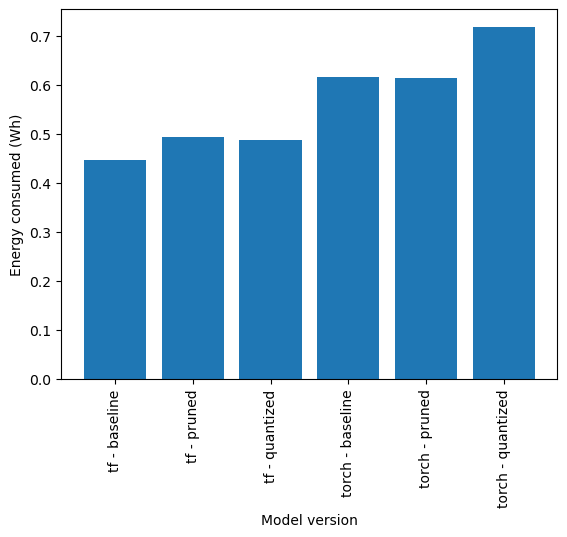

In [19]:
plot_df = group_version.reset_index()
plt.bar(np.arange(len(plot_df)), plot_df['energy_consumed'])

plt.xticks(np.arange(len(plot_df)), plot_df['framework'] + ' - ' + plot_df['version'], rotation='vertical')

plt.xlabel('Model version')
plt.ylabel('Energy consumed (Wh)')

plt.show()

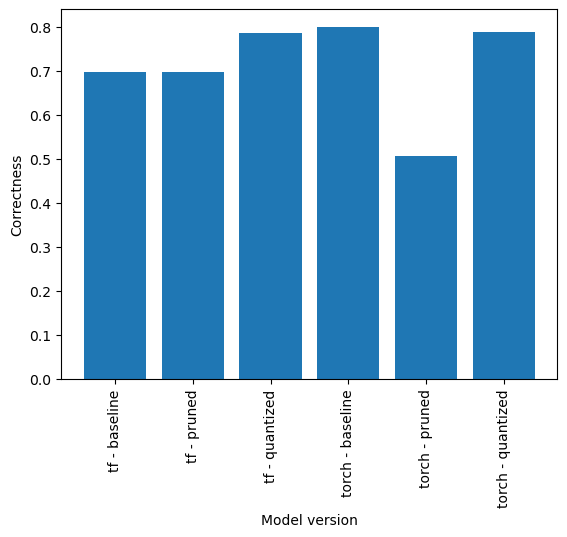

In [20]:
plt.bar(np.arange(len(plot_df)), plot_df['correctness'])

plt.xticks(np.arange(len(plot_df)), plot_df['framework'] + ' - ' + plot_df['version'], rotation='vertical')

plt.xlabel('Model version')
plt.ylabel('Correctness')

plt.show()

### RQ2

In [21]:
group_model = inference.groupby(['domain', 'model']).mean()
group_model

duration  energy_consumed  correctness
domain          model                                              
Code            codegpt     45.596017         0.730006     0.531046
                codeparrot  59.436027         0.951132     0.620015
Computer Vision regnet       4.277687         0.068875     0.717222
                resnet       5.805064         0.093720     0.750000
NLP             gpt2        48.857593         0.786940     0.828890
                opt         46.681687         0.748357     0.822540

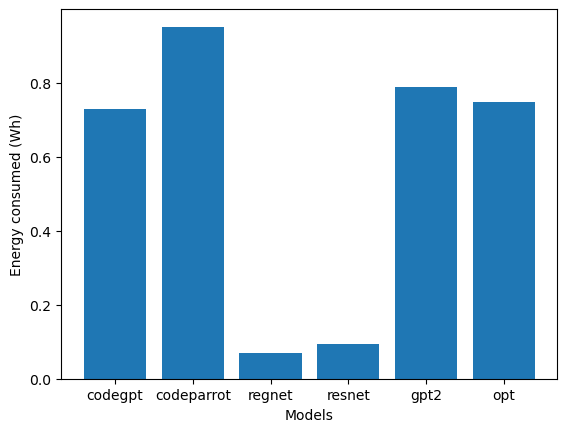

In [22]:
plot_df = group_model.reset_index()
plt.bar(plot_df['model'], plot_df['energy_consumed'])

plt.xlabel('Models')
plt.ylabel('Energy consumed (Wh)')

plt.show()

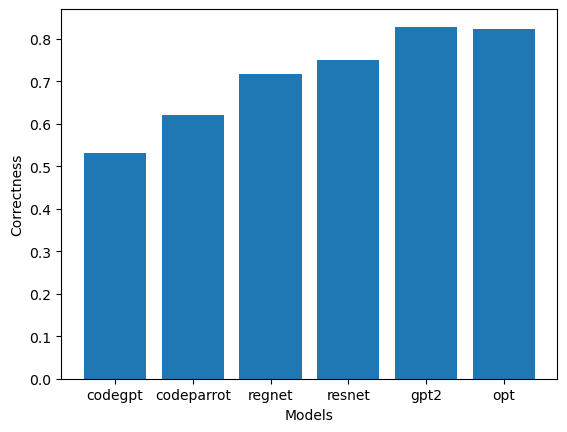

In [23]:
plt.bar(plot_df['model'], plot_df['correctness'])
plt.xlabel('Models')
plt.ylabel('Correctness')
plt.show()